# 1. Uso básico de GPyOpt

In [33]:
import GPy
import GPyOpt
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import os

# 1. Implementación en una dimensión

In [2]:
# Define the function 
def fpol(x):
#     f = np.poly1d([1, -2, -28, 28, 12, -26, 100])
    SineLowFreq = np.sin(x * 0.01 * np.pi)
    SineMedFreq = 0.25 * np.sin(x * 0.01 * np.pi * 4.9)
    SineHighFreq = 0.15 * np.sin(x * 0.01 * np.pi * 12.1)
#    f = SineLowFreq + SineMedFreq + SineHighFreq;
    f = SineLowFreq - SineMedFreq + 0.00001*x**2
#     f = SineLowFreq
    # Return the value of the polynomial
    return f 

Minimum of -0.9429 occurs at 134.6885


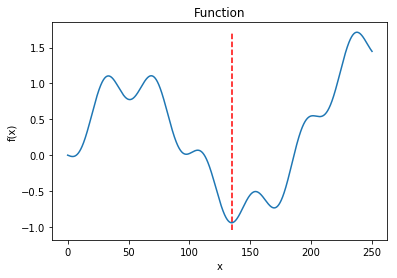

In [3]:
# Plot the function

# Space over which to evluate the function is -5 to 6
xmin=0
xmax=250
x = np.linspace(xmin,xmax, 10000)
y = fpol(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
#plt.figure(figsize = (8, 6))
#plt.style.use('fivethirtyeight')
plt.title('Function'); 
plt.xlabel('x'); 
plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 0.1, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [5]:
# Define the function's bounds
bounds1D = [{'name': 'x', 'type': 'continuous', 'domain': (xmin,xmax)}]  # problem constraints 

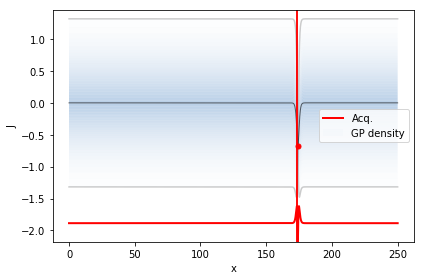

0

In [103]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=1
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=0     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mkdir initer1/")
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata initer1/.")

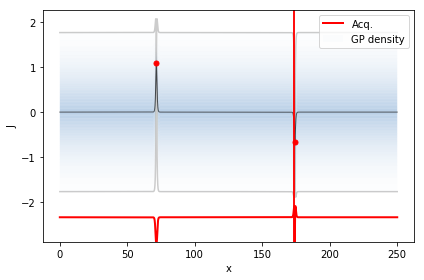

0

In [104]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=2
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=0     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mkdir initer2/")
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata initer2/.")

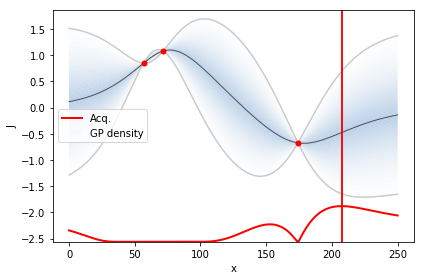

0

In [36]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=0     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata initer/.")

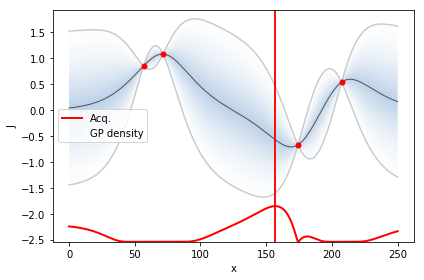

0

In [37]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=1     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval1/.")

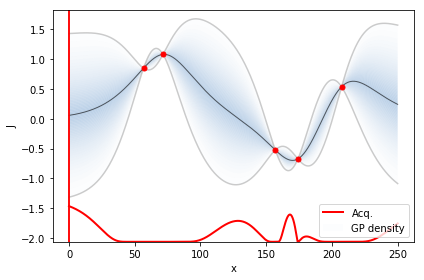

0

In [38]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=2     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval2/.")

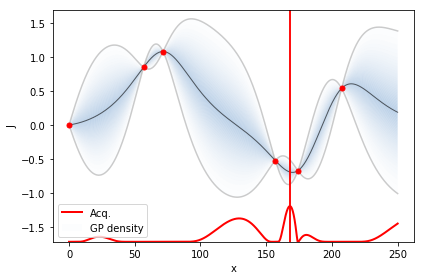

0

In [39]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=3     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval3/.")

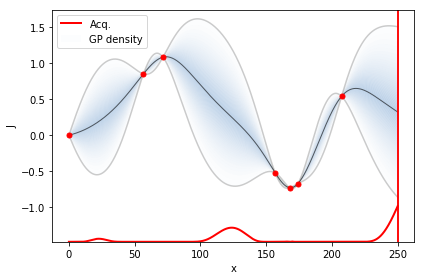

0

In [40]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=4     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval4/.")

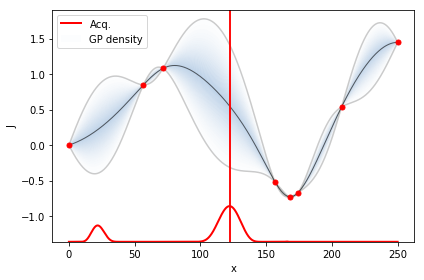

In [16]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=5     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval"+str(max_iter)+"/.")

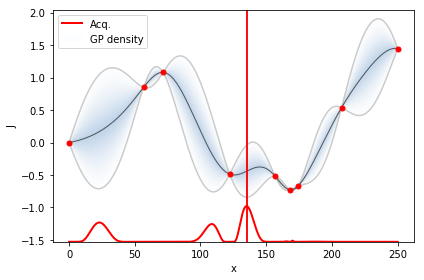

0

In [43]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=6     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval"+str(max_iter)+"/.")

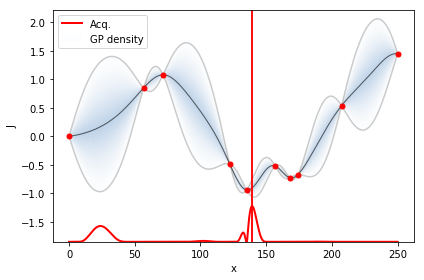

0

In [44]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=7     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval"+str(max_iter)+"/.")

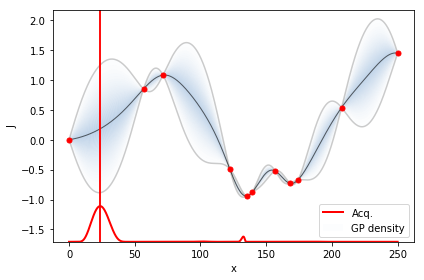

0

In [49]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=8     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval"+str(max_iter)+"/.")

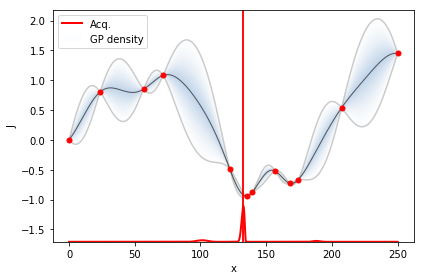

0

In [50]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=9     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval"+str(max_iter)+"/.")

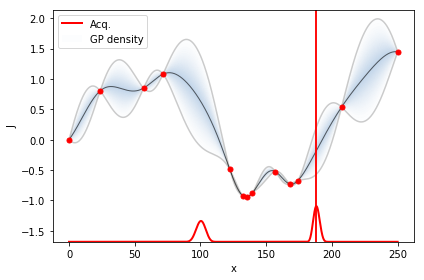

0

In [51]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=10     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
os.system("mv acquisition mean mean_less mean_plus Xdata xgrid xline Ydata eval"+str(max_iter)+"/.")

# Plots

In [112]:
from matplotlib import colors as mcolors

In [113]:
mpl_blue_rvb = (191. / 255., 209. / 256., 212. / 255.)

In [220]:
mpl_darkblue_rvb =  'tab:blue'

In [254]:
def plot_gp(folder,x,y,top,bottom):
    x_grid=np.loadtxt(folder+"xgrid")
    m=np.loadtxt(folder+"mean")
    m_plus=np.loadtxt(folder+"mean_plus")
    m_less=np.loadtxt(folder+"mean_less")
    Xdata=np.loadtxt(folder+"Xdata")
    Ydata=np.loadtxt(folder+"Ydata")
    acqu=np.loadtxt(folder+"acquisition")
    xline=np.loadtxt(folder+"xline")
    fill_color = mpl_blue_rvb
    fig = plt.figure(figsize=(10,7))
    ax = plt.subplot(111)
    plt.plot(x, y,'k--',lw=1)
    plt.plot(x_grid,m,mpl_darkblue_rvb,lw=2,label='Media')
    ax.fill_between(x_grid, m_plus, m_less, facecolor=mpl_blue_rvb,label='Incerteza')
    plt.plot(Xdata, Ydata, 'r.', markersize=16)
    plt.plot(x_grid,acqu, 'r-',lw=2,label ='Adquisición')
    plt.axvline(x=xline,color='r')
    plt.ylim(bottom, top)
    plt.xlabel('$x$',fontsize=22)
    plt.ylabel('$f(x)$',fontsize=22)
    plt.legend(loc='upper left',fontsize=18)
    ax.tick_params(direction='out',labelsize=18)
    plt.savefig(folder+"example.eps")
    plt.show()

In [239]:
folder="initer/"
x_grid=np.loadtxt(folder+"xgrid")
m=np.loadtxt(folder+"mean")
m_plus=np.loadtxt(folder+"mean_plus")
m_less=np.loadtxt(folder+"mean_less")
Xdata=np.loadtxt(folder+"Xdata")
Ydata=np.loadtxt(folder+"Ydata")
acqu=np.loadtxt(folder+"acquisition")
xline=np.loadtxt(folder+"xline")
fill_color = mpl_blue_rvb

In [246]:
top=3.5
bottom=-2.8

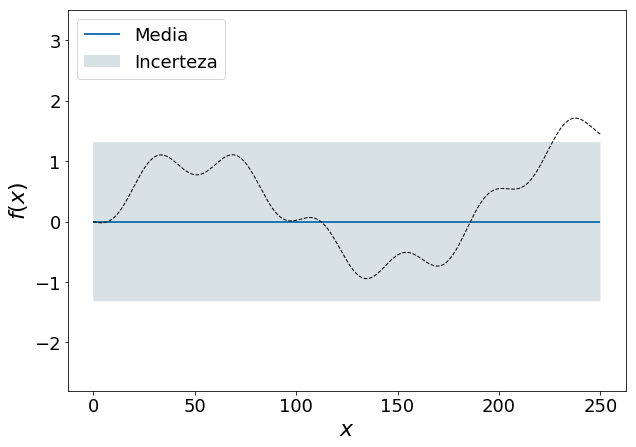

In [249]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
plt.plot(x, y,'k--',lw=1)
plt.ylim(bottom, top)
plt.xlabel('$x$',fontsize=22)
plt.ylabel('$f(x)$',fontsize=22)
plt.hlines(0, 0, 250, color=mpl_darkblue_rvb,lw=2, linestyles='solid',label='Media')
ax.fill_between(x,1.317,-1.317, facecolor=mpl_blue_rvb,alpha=0.6,label='Incerteza')
ax.tick_params(direction='out',labelsize=18)
plt.legend(loc='upper left',fontsize=18)
plt.savefig("./funcion.eps")
plt.show()

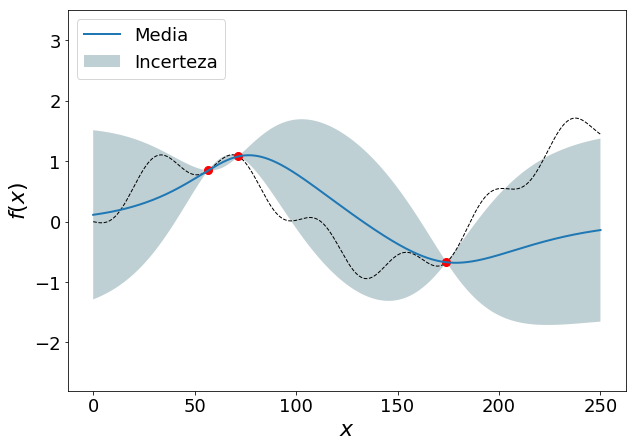

In [250]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
plt.plot(x, y,'k--',lw=1)
plt.plot(Xdata, Ydata, 'r.', markersize=16)
plt.plot(x_grid,m,color=mpl_darkblue_rvb,lw=2,label='Media')
ax.fill_between(x_grid, m_plus, m_less, facecolor=mpl_blue_rvb,label='Incerteza')
plt.ylim(bottom, top)
plt.xlabel('$x$',fontsize=22)
plt.ylabel('$f(x)$',fontsize=22)
ax.tick_params(direction='out',labelsize=18)
plt.legend(loc='upper left',fontsize=18)
plt.savefig("./func_mean.eps")
plt.show()

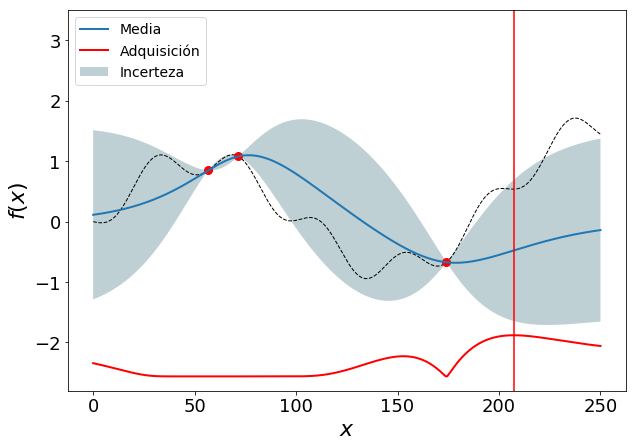

In [253]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
plt.plot(x, y,'k--',lw=1)
plt.plot(Xdata, Ydata, 'r.', markersize=16)
plt.plot(x_grid,m,color=mpl_darkblue_rvb,lw=2,label='Media')
ax.fill_between(x_grid, m_plus, m_less, facecolor=mpl_blue_rvb,label='Incerteza')
plt.plot(x_grid,acqu, 'r-',lw=2,label ='Adquisición')
plt.axvline(x=xline,color='r')
plt.ylim(bottom, top)
plt.xlabel('$x$',fontsize=22)
plt.ylabel('$f(x)$',fontsize=22)
plt.legend(loc='upper left',fontsize=14)
ax.tick_params(direction='out',labelsize=18)
plt.savefig("./func_acq.eps")
plt.show()

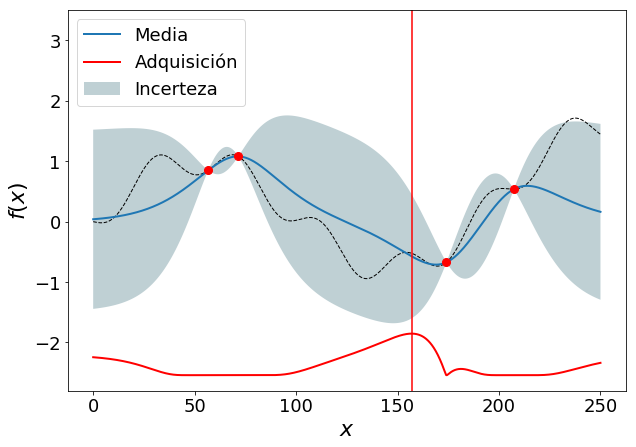

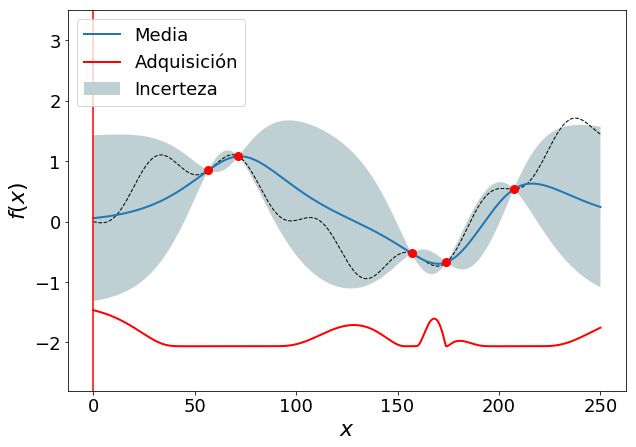

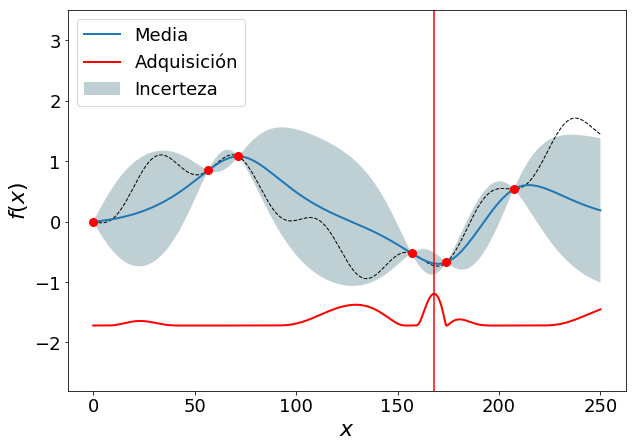

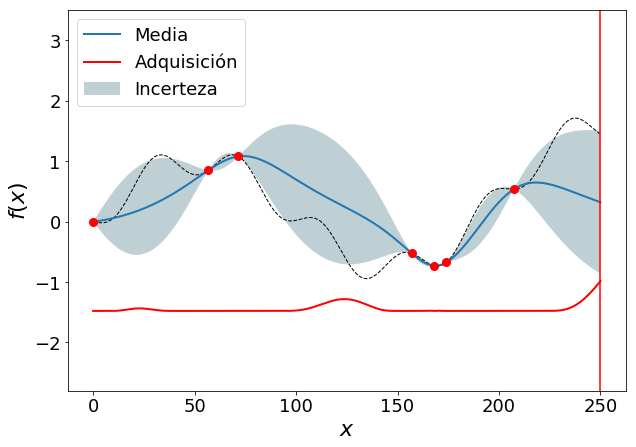

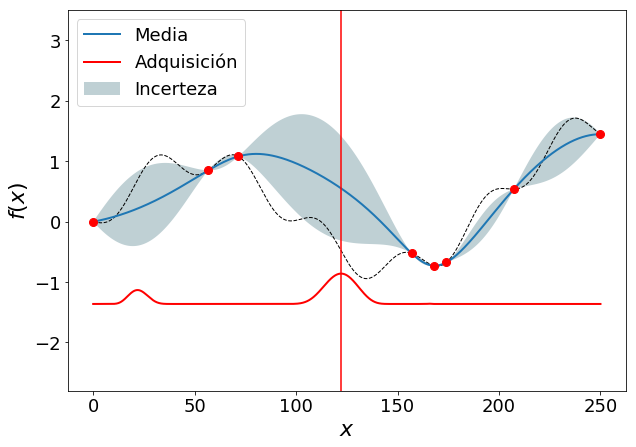

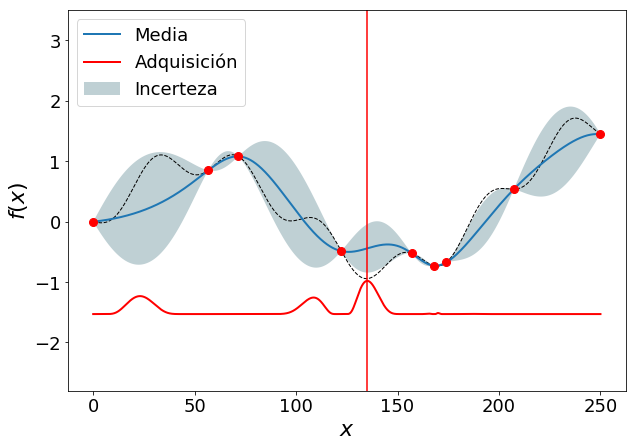

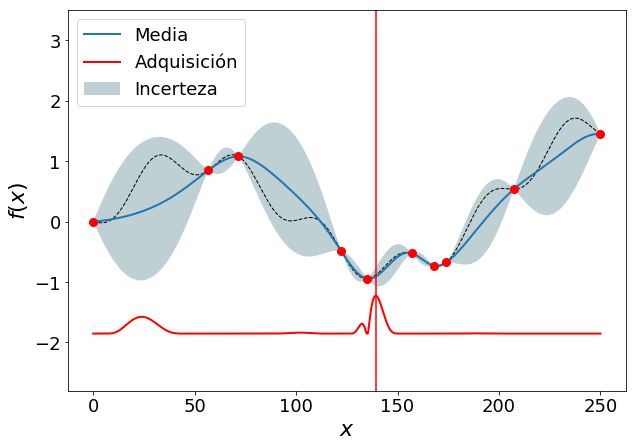

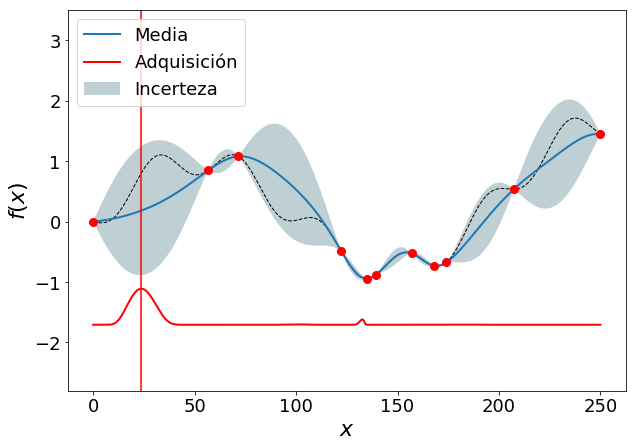

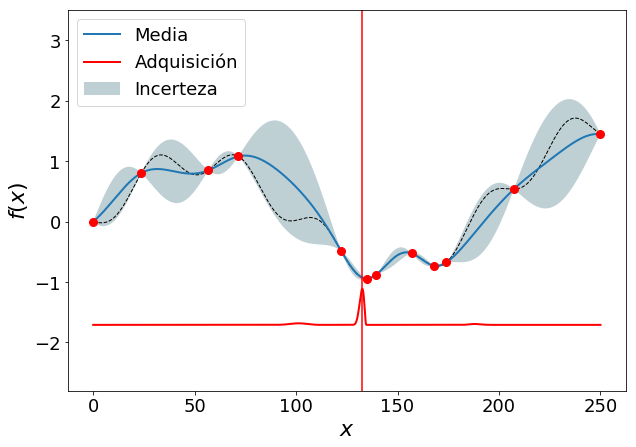

In [255]:
plot_gp("eval1/",x,y,top,bottom)
plot_gp("eval2/",x,y,top,bottom)
plot_gp("eval3/",x,y,top,bottom)
plot_gp("eval4/",x,y,top,bottom)
plot_gp("eval5/",x,y,top,bottom)
plot_gp("eval6/",x,y,top,bottom)
plot_gp("eval7/",x,y,top,bottom)
plot_gp("eval8/",x,y,top,bottom)
plot_gp("eval9/",x,y,top,bottom)